# 觀察資料分布
* YELP
    * 50 review above 
    * join business, check-in and tips

# Import

In [2]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-5u40zvv_ because the default path (/home/emma/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
# 導入資料
all_df = pd.read_pickle('../Data/restaurant_only.pkl')
res_df = pd.read_pickle ('../data/ORI_by_postal_code_s_dropped.pkl')
all_filtered_df = pd.read_pickle('../Data/restaurant_only_filtered.pkl')


In [4]:
all_df.shape , res_df.shape , all_filtered_df.shape

((387723, 20), (1848, 5), (387723, 20))

In [4]:
all_df.head()

,business_id,stars_x,useful,funny,cool,text,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
120,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,Underwhelming. Food is ok. Service is stand...,2021-05-17 12:47:05,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
122,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,Enjoyed a solid brunch here Saturday. Has bot...,2021-10-11 02:05:12,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
124,XQfwVwDr-v0ZS3_CbbE5Xw,5.0,0,0,0,A big shout out to the servers and management ...,2021-09-22 13:06:13,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
141,XQfwVwDr-v0ZS3_CbbE5Xw,5.0,0,0,0,Best brunch menu around. Something for everyon...,2021-04-18 23:34:04,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
153,XQfwVwDr-v0ZS3_CbbE5Xw,1.0,0,0,0,"Terrible host service, 45 minute wait, seated ...",2021-09-11 15:08:33,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."


In [7]:
res_df.head()

,business_id,name,postal_code,review_count,categories
0,hy5GpGXAna-5qrb3zNub6g,On The Border Mexican Grill & Cantina,08054,168,"Mexican, Restaurants, Food, Tex-Mex"
105,aqqZT3wqqhIkuvVxNrnbLg,On The Border Mexican Grill & Cantina,46142,108,"Restaurants, Tex-Mex, Mexican"
178,wtnxz8f51VY81Ng8rr_8Dg,On The Border Mexican Grill & Cantina,46123,102,"Restaurants, Tex-Mex, Mexican"
242,hHMSW3eOtPLwk7XhKurvuw,On The Border Mexican Grill & Cantina,19020,180,"Tex-Mex, Restaurants, Mexican"
333,AIlLlbE3rMSwZ0H3o27Skg,On The Border Mexican Grill & Cantina,46250,113,"Food, Food Delivery Services, Mexican, Tex-Mex..."


In [5]:
res_review_dict = {}
for id in Counter(res_df.business_id):
    res_review_dict[id] = {}
    
    res = all_filtered_df[all_filtered_df.business_id == id]
    try:
        res_review_dict[id]['review_cnt'] = len(res)
        res_review_dict[id]['review_len'] = len(''.join(res.text.tolist()).split())
    except:
        res_review_dict[id]['review_cnt'] = 0
        res_review_dict[id]['review_len'] = 0
    

In [6]:
res_review_df =  pd.DataFrame(res_review_dict).T

In [7]:
res_review_df.describe()

,review_cnt,review_len
count,1848.000000,1848.000000
mean,17.225108,1489.259199
std,21.297724,1848.051784
min,0.000000,0.000000
25%,5.000000,402.000000
50%,10.000000,831.500000
75%,21.000000,1860.000000
max,285.000000,21460.000000


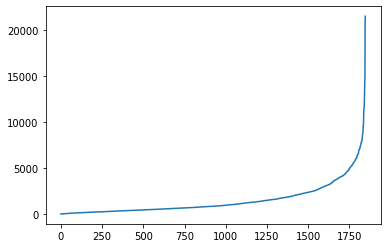

In [54]:
plt.plot(sorted(res_review_df.review_len))

In [4]:
all_filtered_df['review_len'] = all_filtered_df.text.apply(lambda x : len(x.split()))

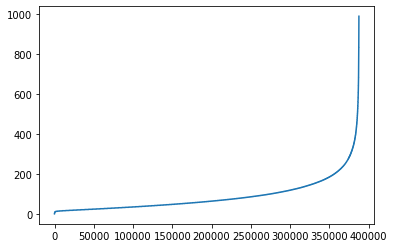

In [5]:
plt.plot(sorted(all_filtered_df.review_len))

In [6]:
all_filtered_df.review_len.describe()

count    387723.000000
mean         88.216245
std          82.152006
min           1.000000
25%          35.000000
50%          63.000000
75%         112.000000
max         988.000000
Name: review_len, dtype: float64